# Loading in data and importing libraries needed later

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# logiistic regression, allows you to predict differnt classes
# patrial least sqyares regression, also used for classes sometimes
data_location = 'TCGA_GBM_LGG_Mutations_all.csv'
df = pd.read_csv(data_location)
data = df.values
#making another copy of the data to store edited values
data2 = df.values
# making another copy to store rounded ages
data_roundedages = df.values

import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import r2_score
from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score
from sklearn.metrics import RocCurveDisplay

# Convert string of the age to numbers
From the bar graph, it is clear that there is at least some significant correlation between age and the glioma form the patient has. Because the model being used is going to take in binary variables, new 'dummy variables' should be made to store which age group a patient belongs to.

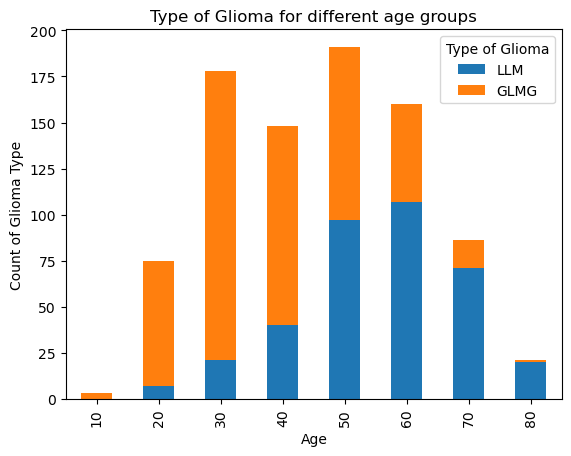

Looks like we have 35  total columns now.
['LGG' 'TCGA-LGG' 'TCGA-HW-A5KM' 'Male' 30 'Astrocytoma, NOS' 'white'
 'MUTATED' 'MUTATED' 'MUTATED' 'NOT_MUTATED' 'NOT_MUTATED' 'NOT_MUTATED'
 'NOT_MUTATED' 'NOT_MUTATED' 'NOT_MUTATED' 'NOT_MUTATED' 'NOT_MUTATED'
 'NOT_MUTATED' 'NOT_MUTATED' 'NOT_MUTATED' 'NOT_MUTATED' 'NOT_MUTATED'
 'NOT_MUTATED' 'NOT_MUTATED' 'NOT_MUTATED' 'NOT_MUTATED' 0 0 1 0 0 0 0 0]


In [2]:
for i in range(len(data[:,4])):
    trial = data[i, 4]
    trialarray = trial.split()
    #making the age from str to int (had to remove decimal because not all have it)
    #patient 42, 438, 672, 707 and 795 dont have the info, so gonna remove them
    if i != 41 and i != 437 and i != 671 and i != 706 and i != 794:
        age1 = int(trialarray[0])
        age1 = round(age1, 3)
    else:
        age1 = 50
    data2[i, 4] = age1
#print(data2[:,4])
    # editing the data array with the new ages (in integer format)
    # note to self: if this reruns, it will try to rewrite the integer, and there WILL be errors
    
###### Rounding ages to groups
for i in range(len(data2[:,4])):
    trial = data2[i, 4]
    if i != 41 and i != 437 and i != 671 and i != 706 and i != 794:
        age1 = int(trial/10)
        age1 = age1*10
    # assuming age if not given
    else:
        age1 = 50
    data2[i, 4] = age1
    
count_data = df.groupby([(data2[:, 4]), (data2[:, 0])]).size().unstack()
ax = count_data.plot(kind='bar', stacked=True)
plt.title('Type of Glioma for different age groups')
plt.xlabel('Age')
plt.ylabel('Count of Glioma Type')
legend_labels = ['LLM', 'GLMG']
ax.legend(legend_labels, title='Type of Glioma')
plt.show()

# multiple options, so split the categories
ages = data2[:, 4]

# Get unique age values
unique_ages = np.unique(ages)

# Create dummy columns for each unique age
dummy_columns = [np.where(ages == age, 1, 0) for age in unique_ages]

# Add these columns to your original array
# Assuming data2 is a 2D NumPy array
data2 = np.column_stack((data2, *dummy_columns))


print("Looks like we have", data2.shape[1], " total columns now.")
print(data2[2, :])

# Represent mutated and not mutated in binary 0s and 1s for easier processing - do the same for gender.

In [3]:
for k in range(7, 27):
    for i in range(len(data2[2:,k])+2):
        trial = data2[i, k]
        if trial == "MUTATED":
            data2[i, k] = 1
        else:
            data2[i, k] = 0
print(data2[676,0:28])


print(len(data2[2:,k])+2)
print("Looks like we have", data2.shape[1], " total columns now.")

['GBM' 'TCGA-GBM' 'TCGA-06-0166' 'Male' 50 'Glioblastoma' 'white' 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
862
Looks like we have 35  total columns now.


In [4]:
for i in reversed(range(len(data2[:, 3]))):
    trial = data2[i, 3]
    if trial == "Male":
        data2[i, 3] = 0
    if trial == "Female":
        data2[i, 3] = 1
    elif trial == "--":
        data2 = np.delete(data2, i, axis=0)
print("Looks like we have", data2.shape[0], " total rows now.")

Looks like we have 858  total rows now.


# Converting race to something the model can run
Observe that there is not a lot of racial diversity in the data, and in the interest of preventing overfitting, one approach is to convert to 'white' and 'nonwhite'.

In [5]:

print(len(data2[:, 0]))
print(len(data2[:, 6]))

# count_data = df.groupby([(data2[:, 0]), (data2[:, 6])]).size().unstack()
# ax = count_data.plot(kind='bar', stacked=True)
# plt.xlabel('Type of Glioma')
# plt.ylabel('Count')
# plt.title('Type of Glioma for different races')
# race_legend = ['Unavailable', 'American Indian/Alaska Native', 'Asian', 'Black/African American', 'Not reported', 'White']
# ax.legend(race_legend, title='Race')
# plt.show()

for i in range(len(data2[:,6])):
    trial = data2[i, 6]
    if trial == 'white':
        race = 1
    else:
        race = 0
    data2[i, 6] = race
print("Looks like we have", data2.shape[1], " total columns now.")

858
858
Looks like we have 35  total columns now.


In [6]:
print(data2[676,0:28])

['GBM' 'TCGA-GBM' 'TCGA-28-1749' 0 70 'Glioblastoma' 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


# Use the column with the 'initial diagnoses'

print(data[:,5])
This prints us out different diagnoses of glioma, such as:
Primary_Diagnosis
Oligodendroglioma, NOS
Mixed glioma
Astrocytoma, NOS

Looks like we'll need to create dummy variables, inspired by https://www.justintodata.com/logistic-regression-example-in-python/

In [7]:
# Convert LGG/GBM to 0 and 1
for i in range(len(data2[:,0])):
    trial = data2[i, 0]
    #print(trial)
    if trial == "LGG":
        data2[i,0] = 0
    else:
        data2[i,0] = 1

        
# # multiple options, so split the categories
categories_split = np.array([entry.split(',') for entry in data2[:, 5]], dtype=object)

# # make unique categories for each type
unique_categories = np.unique(categories_split)
dummy_variables = np.eye(len(unique_categories))[np.searchsorted(unique_categories, categories_split)]
data_v2 = np.concatenate((data2, dummy_variables), axis=1)
        
print(data_v2[857,:])



[1 'TCGA-GBM' 'TCGA-06-2557' 0 70 'Glioblastoma' 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0.0 0.0 1.0 0.0 0.0 0.0]


In [8]:
print("Looks like we have", data_v2.shape[1], " total columns now.")
print(data_v2[1:31, :])

Looks like we have 41  total columns now.
[[0 'TCGA-LGG' 'TCGA-QH-A6CY' ... 1.0 0.0 0.0]
 [0 'TCGA-LGG' 'TCGA-HW-A5KM' ... 0.0 0.0 0.0]
 [0 'TCGA-LGG' 'TCGA-E1-A7YE' ... 0.0 0.0 0.0]
 ...
 [0 'TCGA-LGG' 'TCGA-DU-6399' ... 0.0 1.0 0.0]
 [0 'TCGA-LGG' 'TCGA-DU-A7TA' ... 0.0 1.0 0.0]
 [0 'TCGA-LGG' 'TCGA-HT-A5RA' ... 0.0 0.0 0.0]]


Now, let's delete column 1 and 2 (redunandant information and ID taggers respectively). We have converted the initial diagnoses, and ages, to dummy variables added on to the end columns, so deleting that too.

In [9]:
data_v2 = np.delete(data_v2, 5, axis=1)
data_v2 = np.delete(data_v2, 4, axis=1)
data_v2 = np.delete(data_v2, 2, axis=1)
data_v2 = np.delete(data_v2, 1, axis=1)

print("Looks like we have", data_v2.shape[1], " total columns now.")
# notice that rows 2 to 22 now hold the genetic data

Looks like we have 37  total columns now.


In [10]:
print(data_v2[857, :])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0.0 0.0 1.0
 0.0 0.0 0.0]


# Time to split the data

In [11]:
kf = KFold(n_splits=10, shuffle=True)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=True)


In [12]:
#But first lets make it into a dataframe again
df = pd.DataFrame(data_v2)
random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.1, random_state=random_seed, stratify=df[0])
print(df_train)
print(df_test)

    0  1  2  3  4  5  6  7  8  9   ... 27 28 29 30   31   32   33   34   35  \
383  0  0  1  1  0  0  0  0  1  0  ...  0  0  0  0  0.0  0.0  0.0  0.0  0.0   
396  0  0  1  1  0  0  0  0  1  0  ...  1  0  0  0  0.0  0.0  0.0  0.0  0.0   
299  0  1  1  1  1  1  0  0  0  0  ...  0  0  0  0  0.0  1.0  0.0  0.0  0.0   
751  1  1  1  0  1  0  1  0  0  0  ...  0  0  1  0  0.0  0.0  1.0  0.0  0.0   
668  1  0  1  0  0  0  1  0  0  0  ...  0  0  1  0  0.0  0.0  1.0  0.0  0.0   
..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. ..  ...  ...  ...  ...  ...   
646  1  0  1  0  1  0  1  0  0  0  ...  0  0  1  0  0.0  0.0  1.0  0.0  0.0   
395  0  1  0  0  0  0  0  0  0  0  ...  0  0  0  0  1.0  0.0  0.0  0.0  0.0   
488  0  0  1  1  1  0  0  0  0  0  ...  0  0  0  0  0.0  0.0  0.0  1.0  0.0   
650  1  0  1  0  1  0  0  0  0  1  ...  0  0  1  0  0.0  0.0  1.0  0.0  0.0   
66   0  0  1  1  0  0  0  0  1  0  ...  1  0  0  0  0.0  0.0  0.0  0.0  1.0   

      36  
383  1.0  
396  1.0  
299  0.0  
751  0.

# Going from k = 1 all the way to k = 28

Confusion Matrix


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


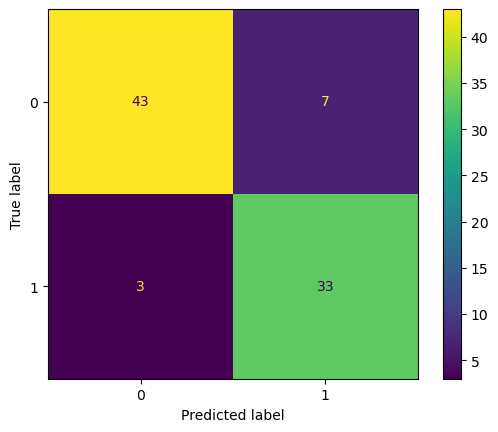

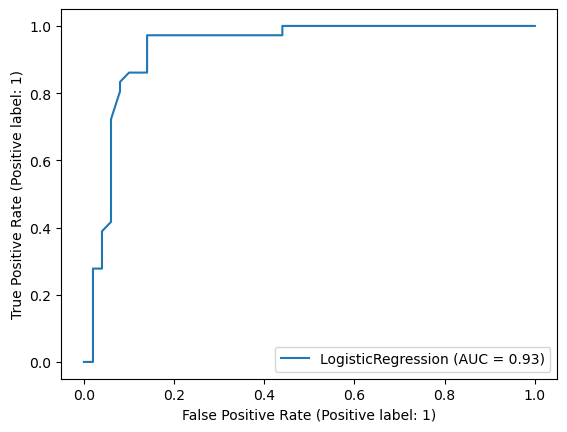

In [13]:
k = 22
X = df_train.iloc[:, 1:k] # should be 27
y = df_train.iloc[:, 0]

X = X.astype(int)
y = y.astype(int)

clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

X_test = df_test.iloc[:, 1:k]
y_test = df_test.iloc[:, 0]
y_test = y_test.astype(int)
X_test = X_test.astype(int)

test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay
print('Confusion Matrix')
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
#cm_display.plot()
cm_display2 = RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [14]:
# The cell below prints out values from the confusion matrix every time a column is added. note that not all columns help.

In [15]:
import warnings

# Suppress FutureWarning for 'penalty='none''
warnings.simplefilter(action='ignore', category=FutureWarning)

#gotta make the empty np array (for conf matrix values) first, 
# with 1 row (we'll be adding em on later) and 4 columns
accuracies = np.empty((1, 4))
accuracies = accuracies.astype(int)

for k in range(2, 27):
    X = df_train.iloc[:, 1:k] # should be 27 (actualy 22)
    y = df_train.iloc[:, 0]
    X = X.astype(int)
    y = y.astype(int)
    clf = LogisticRegression(penalty='none', max_iter=1000) # logistic regression with no penalty term in the cost function.
    clf.fit(X, y)
    
    X_test = df_test.iloc[:, 1:k]
    y_test = df_test.iloc[:, 0]
    y_test = y_test.astype(int)
    X_test = X_test.astype(int)
    
    test_prob = clf.predict_proba(X_test)[:, 1]
    test_pred = clf.predict(X_test)
    #print(test_prob, test_pred)
    
    from sklearn.metrics import ConfusionMatrixDisplay
    cm = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
    #cm_display.plot()
    plt.close()
    
    confusion_matrix = cm.confusion_matrix
    confusion_matrix = confusion_matrix.astype(int)
    # now, I'll extract true_pos, false_pos, false_neg, and true_neg, 
    # and store them in an array. 

    new_row = np.array([
        int(round(confusion_matrix[1, 1])),
        int(round(confusion_matrix[0, 1])),
        int(round(confusion_matrix[1, 0])),
        int(round(confusion_matrix[0, 0]))
    ])
    
    print(new_row)
    
    #accuracies.append(new_row)
    
    accuracies = np.concatenate([accuracies, [new_row]], axis=0)
    #accuracies = np.concatenate((accuracies, new_row[np.newaxis, :]), axis=0)

    #plt var 1 by var 2, coloured for accuracy to see trends

[ 0  0 36 50]
[ 4  0 32 50]
[35 10  1 40]
[35 10  1 40]
[35 10  1 40]
[35 10  1 40]
[35 10  1 40]
[35 10  1 40]
[35 10  1 40]
[35 10  1 40]
[34 10  2 40]
[34  9  2 41]
[34  9  2 41]
[34  9  2 41]
[34  9  2 41]
[34  9  2 41]
[34  9  2 41]
[34  9  2 41]
[34  9  2 41]
[34  6  2 44]
[33  7  3 43]
[33  7  3 43]
[33  7  3 43]
[32  6  4 44]
[33  6  3 44]


### Okay so now we know how the confusion matrix works. We want to build a model that has 95%+ accuracy but minimizes the number of genes. Let's see if we can extract the matrix values we get for one iteration, and store them.

In [16]:
#print(accuracies)

In [44]:
from itertools import combinations

# remember that rows 2 to 22 now hold the genetic data, but its still 20 points to choose from
total_columns = 20
# increase this if results not good
num_columns_to_select = 2

accuracies = np.empty((0, 4))
accuracies = accuracies.astype(int)

actual_accuracy_list = np.empty((0,1))

# start at 2 because column 0 holds the results, and column 1 holds the race
column_combinations = [combo for combo in combinations(range(2, total_columns), num_columns_to_select)]
# empty list to store the order of which columns are being chosen in each iteration 
selected_columns_list = []
selected_combos_list = []

for combo in column_combinations:
    selected_columns = data[:, list(combo)]
    selected_combos_list.append(combo)
    selected_columns_list.append(selected_columns)
    
    selected_columns = pd.concat([df_train.iloc[:, list(combo)], df_train.loc[:, 23:40]], axis=1) # columns 23 ro 40 are 'free' data

    #X = df_train.iloc[:, list(combo)] # should be 27 (actualy 22)
    #X = df_train.iloc[:, list(combo)+list(range(23, 28))]
    X = df_train.iloc[:, list(combo)+list(range(1,2))+list(range(23, 28))]
    y = df_train.iloc[:, 0]
    X = X.astype(int)
    y = y.astype(int)
    clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.
    clf.fit(X, y)
    
    #X_test = df_test.iloc[:, list(combo)]
    X_test = df_test.iloc[:, list(combo)+list(range(1,2))+list(range(23, 28))]
    y_test = df_test.iloc[:, 0]
    y_test = y_test.astype(int)
    X_test = X_test.astype(int)
    
    test_prob = clf.predict_proba(X_test)[:, 1]
    test_pred = clf.predict(X_test)
    #print(test_prob, test_pred)
    
    from sklearn.metrics import ConfusionMatrixDisplay
    cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
    #cm_display.plot()
    plt.close()
    confusion_matrix = cm_display.confusion_matrix
    confusion_matrix = confusion_matrix.astype(int)
    # now, I'll extract true_pos, false_pos, false_neg, and true_neg, 
    # and store them in an array. 

    new_row = np.array([
        int(round(confusion_matrix[1, 1])),
        int(round(confusion_matrix[0, 1])),
        int(round(confusion_matrix[1, 0])),
        int(round(confusion_matrix[0, 0]))
    ])
    #print(new_row)
    #accuracies.append(new_row)
    
    accuracies = np.concatenate([accuracies, [new_row]], axis=0)
    
    actual_accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / np.sum(confusion_matrix)
    actual_accuracy_list = np.append(actual_accuracy_list, [[actual_accuracy]], axis=0)
    print(actual_accuracy)
    # actual_accuracies = np.concatenate([actual_accuracies, actual_accuracy], axis=0)

0.872093023255814
0.7558139534883721
0.7674418604651163
0.8023255813953488
0.7790697674418605
0.8372093023255814
0.7441860465116279
0.7558139534883721
0.7558139534883721
0.7441860465116279
0.7674418604651163
0.7790697674418605
0.7674418604651163
0.7558139534883721
0.7558139534883721
0.7558139534883721
0.7674418604651163
0.8837209302325582
0.8604651162790697
0.872093023255814
0.8837209302325582
0.872093023255814
0.872093023255814
0.8837209302325582
0.8604651162790697
0.8837209302325582
0.8837209302325582
0.872093023255814
0.8953488372093024
0.872093023255814
0.872093023255814
0.8837209302325582
0.872093023255814
0.7790697674418605
0.8023255813953488
0.7674418604651163
0.8372093023255814
0.7558139534883721
0.7674418604651163
0.7674418604651163
0.7558139534883721
0.7674418604651163
0.7906976744186046
0.7558139534883721
0.7674418604651163
0.7674418604651163
0.7674418604651163
0.7790697674418605
0.7906976744186046
0.7790697674418605
0.8372093023255814
0.7674418604651163
0.7674418604651163
0

In [45]:
# so now I have this array of 
actual_accuracy_list.shape

(153, 1)

In [46]:
# Find indices and elements of actual_accuracy list where its above 85%
indices_above_threshold = np.where(actual_accuracy_list > 0.85)[0]
values_above_threshold = actual_accuracy_list[actual_accuracy_list > 0.85]

# Print the results
print("Indices above 0.95:", indices_above_threshold)
print("Values above 0.95:", values_above_threshold)
#observe that even though we did 20 choose 2, essentially only the earlier iterations have highest accuracy. 
# this suggests that genes in the beginning play a larger role.

for index, percent in zip(indices_above_threshold, values_above_threshold):
    print(f"Index: {index}, Percent: {percent}")
    print(selected_combos_list[index])
    # subtracted 2 because the index will ALWAYS start at 2 because that's where our genes start in the df.


Indices above 0.95: [ 0 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 63]
Values above 0.95: [0.87209302 0.88372093 0.86046512 0.87209302 0.88372093 0.87209302
 0.87209302 0.88372093 0.86046512 0.88372093 0.88372093 0.87209302
 0.89534884 0.87209302 0.87209302 0.88372093 0.87209302 0.86046512]
Index: 0, Percent: 0.872093023255814
(2, 3)
Index: 17, Percent: 0.8837209302325582
(3, 4)
Index: 18, Percent: 0.8604651162790697
(3, 5)
Index: 19, Percent: 0.872093023255814
(3, 6)
Index: 20, Percent: 0.8837209302325582
(3, 7)
Index: 21, Percent: 0.872093023255814
(3, 8)
Index: 22, Percent: 0.872093023255814
(3, 9)
Index: 23, Percent: 0.8837209302325582
(3, 10)
Index: 24, Percent: 0.8604651162790697
(3, 11)
Index: 25, Percent: 0.8837209302325582
(3, 12)
Index: 26, Percent: 0.8837209302325582
(3, 13)
Index: 27, Percent: 0.872093023255814
(3, 14)
Index: 28, Percent: 0.8953488372093024
(3, 15)
Index: 29, Percent: 0.872093023255814
(3, 16)
Index: 30, Percent: 0.872093023255814
(3, 17)
Index: 31, Pe

In [47]:
selected_indices = np.where((accuracies[:, 3] >= 40) & (accuracies[:, 0] >= 34))[0]
selected_rows = accuracies[(accuracies[:, 3] >= 40) & (accuracies[:, 0] >= 34)]

# Print the selected rows
#print(selected_rows)
for index, row in zip(selected_indices, selected_rows):
    print(f"Index: {index}, Row: {row}")
    print(selected_combos_list[index])

# from this, we can guess that genes in positions 3 and 5, or perhaps 4 and 5, are the most useful in making predictions. 
# note that the gene in position 2 is actually the "first" gene, because that's where the gene columns begin in our df

Index: 17, Row: [35  9  1 41]
(3, 4)
Index: 20, Row: [34  8  2 42]
(3, 7)
Index: 21, Row: [34  9  2 41]
(3, 8)
Index: 23, Row: [34  8  2 42]
(3, 10)
Index: 25, Row: [34  8  2 42]
(3, 12)
Index: 26, Row: [34  8  2 42]
(3, 13)
Index: 28, Row: [34  7  2 43]
(3, 15)
Index: 31, Row: [34  8  2 42]
(3, 18)


# Other approach: making a heat map

[[0.         0.87209302 0.75581395 0.76744186 0.80232558 0.77906977
  0.8372093  0.74418605 0.75581395 0.75581395 0.74418605 0.76744186
  0.77906977 0.76744186 0.75581395 0.75581395 0.75581395 0.76744186
  0.88372093 0.86046512]
 [0.         0.         0.87209302 0.88372093 0.87209302 0.87209302
  0.88372093 0.86046512 0.88372093 0.88372093 0.87209302 0.89534884
  0.87209302 0.87209302 0.88372093 0.87209302 0.77906977 0.80232558
  0.76744186 0.8372093 ]
 [0.         0.         0.         0.75581395 0.76744186 0.76744186
  0.75581395 0.76744186 0.79069767 0.75581395 0.76744186 0.76744186
  0.76744186 0.77906977 0.79069767 0.77906977 0.8372093  0.76744186
  0.76744186 0.76744186]
 [0.         0.         0.         0.         0.76744186 0.76744186
  0.79069767 0.75581395 0.76744186 0.77906977 0.76744186 0.77906977
  0.81395349 0.86046512 0.79069767 0.80232558 0.80232558 0.80232558
  0.80232558 0.80232558]
 [0.         0.         0.         0.         0.         0.80232558
  0.80232558 0.8

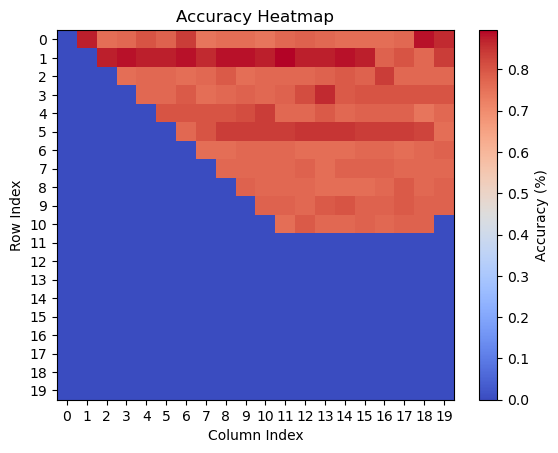

In [48]:
# Assuming accuracies is your NumPy array
# Replace this line with your specific data
accuracies = np.random.rand(10, 4) * 100  # Example data, replace it with your actual accuracies
heatmap = np.zeros((20,20))

count = 0
for i in range(20):
    for j in range(i + 1, 20):
        # Check if there are still elements in actual_accuracy_list
        if count < len(actual_accuracy_list):
            # Assign the value from actual_accuracy_list to the corresponding position in heatmap
            heatmap[i, j] = actual_accuracy_list[count]
            count += 1

# Print the resulting heatmap
print(heatmap)

# # Create a heatmap
plt.imshow(heatmap, cmap='coolwarm', aspect='auto')

# Add labels and show the colorbar
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Accuracy Heatmap')
plt.colorbar(label='Accuracy (%)')
plt.xticks(np.arange(0, 20, 1))
plt.yticks(np.arange(0, 20, 1))

plt.show()

# One interesting trend here is that genes indexed 17, 18, and 19 only really help improve prediction for the gene with index 1. There are other such trends here that are not immediately visible from the raw data, such as the gene indexed at 6 not being 